# Procedural Galaxy Generation
### using NumPy, displaying the result with Matplotlib

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random

Galaxies are represented using the following Galaxy object - at the core it's a square NumPy array of stars.  
The script chooses from 3 types of galaxies to generate - spiral, barred or globular. Spiral galaxies have up to 6 arms and have a distinct whirly look. Barred galaxies have two arms, with a prominent bulge in their center. Globular galaxies are arranged in the shape of a sphere (circle).

In [2]:
class Galaxy:
    
    def __init__(self, size:int):
        '''
        Generates a galaxy made up of stars contained within a NumPy array. The type of the galaxy will be randomly chosen - 13% globular, 37% barred and 50% spiral.
        Small galaxies (size < 1000) will be of globular type.

        :param int size: The side length of the (square) NumPy array. The amount of stars to generate will be calculated based on this number.
        '''

        self.size = size
        self.map = np.full((size,size),Star(zerostar=True)) # zerostar is a placeholder Star object that ensures that all elements of the Galaxy.map array are of the same type
        _type = random.random()
        if _type > 0.87:
            self.type = "globular"
        elif _type > 0.5:
            self.type = "barred"
        else:
            self.type = "spiral"
        # Spiral and barred galaxies only form above a certain size
        if 1000 > self.size:
            self.type = "globular"
        self.__gen_galaxy_map()

    def __gen_galaxy_map(self):
        no_of_stars = math.ceil(self.size**2 *0.017)
        selected_coords = []
        if self.type == "spiral":
            # Spiral galaxy
            pairs_of_arms = random.randint(1,3)
            arm_thickness = self.size*(0.035/pairs_of_arms) # the most spread out stars thicknesswise will be at max 5*arm_thickness away from the center
            arm_length = self.size*0.1                      # the most spread out stars lengthwise will be at max 5*arm_length away from the center
            # Choosing coordinates to place stars at
            match pairs_of_arms:
                case 1:
                    # Two arms
                    for i in range(no_of_stars):
                        x = math.floor(random.normalvariate(self.size*0.5,arm_length))
                        y = math.floor(random.normalvariate(self.size*0.5,arm_thickness))
                        selected_coords.append((y,x))
                case 2:
                    # Four arms
                    for i in range(math.ceil(no_of_stars/pairs_of_arms)):
                        x = math.floor(random.normalvariate(self.size*0.5,arm_length))
                        y = math.floor(random.normalvariate(self.size*0.5,arm_thickness))
                        selected_coords.append((y,x))
                    for i in range(math.ceil(no_of_stars/pairs_of_arms)):
                        x = math.floor(random.normalvariate(self.size*0.5,arm_thickness))
                        y = math.floor(random.normalvariate(self.size*0.5,arm_length))
                        selected_coords.append((y,x))
                case 3:
                    # Six arms
                    for i in range(math.ceil(no_of_stars/pairs_of_arms)):
                        x = math.floor(random.normalvariate(self.size*0.5,arm_length))
                        y = math.floor(random.normalvariate(self.size*0.5,arm_thickness))
                        selected_coords.append((y,x))
                    for i in range(math.ceil(no_of_stars/pairs_of_arms)):
                        _x = math.floor(random.normalvariate(self.size*0.5,arm_length) - self.size*0.5)
                        _y = math.floor(random.normalvariate(self.size*0.5,arm_thickness) - self.size*0.5)
                        x = math.ceil(math.cos(math.pi/3)*_x - math.sin(math.pi/3)*_y + self.size*0.5)
                        y = math.ceil(math.sin(math.pi/3)*_x + math.cos(math.pi/3)*_y + self.size*0.5)
                        selected_coords.append((y,x))
                    for i in range(math.ceil(no_of_stars/pairs_of_arms)):
                        _x = math.floor(random.normalvariate(self.size*0.5,arm_length) - self.size*0.5)
                        _y = math.floor(random.normalvariate(self.size*0.5,arm_thickness) - self.size*0.5)
                        x = math.ceil(math.cos(-math.pi/3)*_x - math.sin(-math.pi/3)*_y + self.size*0.5)
                        y = math.ceil(math.sin(-math.pi/3)*_x + math.cos(-math.pi/3)*_y + self.size*0.5)
                        selected_coords.append((y,x))
            # Background stars
            for i in range(math.ceil(no_of_stars*0.18)):
                x = math.floor(random.normalvariate(0,self.size*0.01)*9 + self.size*0.5)
                y= math.floor(random.normalvariate(0,self.size*0.01)*9 + self.size*0.5)
                selected_coords.append((y,x))
            
            # Filling the chosen positions with stars and applying twist to the galaxy
            rotation_offset = 2*math.pi*random.random()     # this is to make the outputs vary in orientation
            for position in list(set(selected_coords)):
                _x = position[1] - self.size*0.5
                _y = position[0] - self.size*0.5
                star = Star()
                distance_from_center = math.sqrt(_x**2+_y**2)
                rotation = (3-math.log10(star.mass+66)) * math.pi/(self.size*0.07*pairs_of_arms + self.size*0.03)  # heavier stars rotate slower
                x = math.ceil(math.cos(distance_from_center*rotation + rotation_offset)*_x - math.sin(distance_from_center*rotation + rotation_offset)*_y + self.size*0.5)
                y = math.ceil(math.sin(distance_from_center*rotation + rotation_offset)*_x + math.cos(distance_from_center*rotation + rotation_offset)*_y + self.size*0.5)
                self.map[y][x] = star
                        
        elif self.type == "barred":
            # Barred galaxy
            arm_thickness = self.size*0.03  # the most spread out stars thicknesswise will be at max 5*arm_thickness away from the center
            arm_length = self.size*0.1      # the most spread out stars lengthwise will be at max 5*arm_length away from the center

            # Choosing coordinates to place stars at
            # Arms
            for i in range(no_of_stars):
                    x = math.floor(random.normalvariate(self.size*0.5,arm_length))
                    y = math.floor(random.normalvariate(self.size*0.5,arm_thickness))
                    selected_coords.append((y,x))
            # Background stars
            for i in range(math.ceil(no_of_stars*0.1)):
                x = math.floor(random.normalvariate(0,self.size*0.01)*9 + self.size*0.5)
                y= math.floor(random.normalvariate(0,self.size*0.01)*9 + self.size*0.5)
                selected_coords.append((y,x))
            
            # Filling the chosen positions with stars and applying twist to the galaxy
            rotation_offset = 2*math.pi*random.random()     # this is to make the outputs vary in orientation
            for position in list(set(selected_coords)):
                _x = position[1] - self.size*0.5
                _y = position[0] - self.size*0.5
                #twisting
                star = Star()
                distance_from_center = math.sqrt(_x**2+_y**2)
                rotation = (3-math.log10(star.mass+66)) * math.pi/(self.size*0.5)   # heavier stars rotate slower
                part_of_bar = bool(distance_from_center>self.size*0.05)             # stars close to center won't be rotated to form a bar
                x = math.ceil(math.cos(distance_from_center*part_of_bar*rotation + rotation_offset)*_x - math.sin(distance_from_center*part_of_bar*rotation + rotation_offset)*_y + self.size*0.5)
                y = math.ceil(math.sin(distance_from_center*part_of_bar*rotation + rotation_offset)*_x + math.cos(distance_from_center*part_of_bar*rotation + rotation_offset)*_y + self.size*0.5)
                self.map[y][x] = star
            
        else:
            # Globular galaxy
            # Choosing coordinates to place stars at
            for i in range(no_of_stars):
                x = math.floor(random.normalvariate(self.size*0.5,self.size*0.1))
                y = math.floor(random.normalvariate(self.size*0.5,self.size*0.1))
                selected_coords.append((y,x))
            # Filling the chosen positions with stars
            for position in list(set(selected_coords)):
                self.map[position[0]][position[1]] = Star()


Each galaxy is made up of stars - they are represented by the following Star object.  
This is used to generate main-sequence stars, their distribution and properties (mass and temperature) are inspired by real world data.  
Each star has a name generated from a list of syllables found in the names.py file.

In [3]:
import names

class Star:
    
    def __init__(self,zerostar = False):
        '''
        Generates a main sequence star. The type of the star will be picked based on observed distributions.
        The mass and temperature of the star will be generated based on its' type.
        The star will also have a name and sometimes planets.

        :param bool zerostar: If true the star will be a placeholder object with a mass and temperature of 1.
        '''

        # placeholder Star object for use in Galaxy.map
        if zerostar:
            self.type = "zerostar"
            self.mass = 1
            self.temp = 1
            self.name = "empty"
            self.planets = []
            return
        
        # Main sequence type
        _type = random.random()
        if 0.76509 > _type:
            self.type = "M"
        elif 0.88589 > _type:
            self.type = "K"
        elif 0.9624 > _type:
            self.type = "G"
        elif 0.9926 > _type:
            self.type = "F"
        elif 0.99874 > _type:
            self.type = "A"
        elif 0.99995 > _type:
            self.type = "B"
        else:
            self.type = "O"

        match self.type:
            case "O":
                # mass between 16 and 121 suns
                self.mass = 16 + abs(random.normalvariate(0,21))
                self.temp = 30000 + 20000/13.9 * (self.mass-16)
            case "B":
                # mass between 2.1 and 16 suns
                self.mass = 2.1 + random.random()*13.9
                self.temp = 10000 + 20000/13.9 * (self.mass-2.1)
            case "A":
                # mass between 1.4 and 2.1 suns
                self.mass = 1.4 + random.random()*0.7
                self.temp = 7500 + 2500/0.7 * (self.mass-1.4)
            case "F":
                # mass between 1.04 and 1.4 suns
                self.mass = 1.04 + random.random()*0.36
                self.temp = 6000 + 1500/0.36 * (self.mass-1.04)
            case "G":
                # mass between 0.8 and 1.04 suns
                self.mass = 0.8 + random.random()*0.24
                self.temp = 5200 + 800/0.24 * (self.mass-0.8)
            case "K":
                # mass between 0.45 and 0.8 suns
                self.mass = 0.45 + random.random()*0.35
                self.temp = 3700 + 1500/0.35 * (self.mass-0.45)
            case "M":
                # mass between 0.08 and 0.45 suns
                self.mass = 0.08 + random.random()*0.37
                self.temp = 2400 + 1300/0.37 * (self.mass-0.08)
        
        self.__gen_star_name()
        self.__gen_planets()
    
    def __str__(self):
        return f"{self.name} - type {self.type} star | Mass: {str(self.mass)[0:6]} M(sun) | Temperature: {str(self.temp)[0:7]} K | Planets: {len(self.planets)}"

    def __gen_star_name(self):
        name_len = math.ceil(abs(random.normalvariate(1.9,0.24)))   # I really got into working with normal distributions on this project :)
        name = ""
        for n in range(name_len):
            name += random.choice(list(names.star_bits))
        self.name = name.strip().title()
    
    def __gen_planets(self):
        self.planets = []
        no_of_planets = math.floor(abs(random.normalvariate(self.mass,3+self.mass**0.3)))
        # Add first planet
        if not no_of_planets == 0:
            new_planet = Planet(self)
            self.planets.append(new_planet)
        # Add rest of the planets
        for i in range(no_of_planets-1):
            new_planet = Planet(self)
            self.planets.append(new_planet)
            # Checking if the newly added planets' orbit doesn't clash with previous orbits - if so the planet gets removed
            for planet in self.planets[:-1]:
                if  0.3 > abs(planet.orbital_distance - new_planet.orbital_distance):
                    self.planets.pop(-1)


Stars can have planets orbiting them. This is represented by the following Planet object.  
Planets have orbital attributes - distance from star, period, eccentricity and rotational period. These are calculated based on celestial mechanics and could be used for an animated rendering of their star-system.  
Each planet has a 'type' - gas giant, ice giant or telluric (rocky). This determines their mass range and density.

In [4]:
class Planet:
    
    def __init__(self,star:Star):
        # semi-major axis of elliptical orbit, measured in AU
        self.orbital_distance = 0.1 + abs(random.normalvariate(math.sqrt(star.mass),star.mass*20))
        # measured in earth years
        self.orbital_period = 2 * math.pi * math.sqrt(self.orbital_distance**3/(39.478*star.mass))
        # These values can be used for an animated rendering of the star-system
        self.orbit_shift = random.random()
        self.eccentricity = abs(random.normalvariate(0,0.17))
        self.rotation_period = random.normalvariate(20,10) # in earth days
        _type = random.random()
        if _type > 0.6:
            self.type = "gas"
            #mass between 20 and 500 earths
            self.mass = 20 + random.normalvariate(240,48)
            self.radius = self.mass**(1/3) * 5
        elif _type > 0.3:
            self.type = "ice"
            #mass between 7 and 97 earths
            self.mass = 7 + random.normalvariate(45,18)
            self.radius = self.mass**(1/3) * 3
        else:
            self.type = "rocky"
            #mass between 0.02 and 5.02 earths
            self.mass = 0.02 + random.normalvariate(2.5,0.5)
            self.radius = self.mass**(1/3)
            
        self.__gen_planet_name(star)
        
    def __str__(self):
        return f"{self.name} - {self.type} planet | Mass: {str(self.mass)[0:6]} M(earth) | Distance to star: {str(self.orbital_distance)[0:6]} AU | Orbital period: {str(self.orbital_period)[0:6]} years"

    def __gen_planet_name(self,star:Star):
        abc = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
        self.name = star.name + " " + abc[len(star.planets) % len(abc)] + len(star.planets)//len(abc) * '*'
    

### Try them out:

Star generation test:

In [5]:
for i in range(7):
    print(Star())

Bacrusird - type M star | Mass: 0.1341 M(sun) | Temperature: 2590.15 K | Planets: 0
Umrix - type F star | Mass: 1.3007 M(sun) | Temperature: 7086.46 K | Planets: 0
Oltrleh - type M star | Mass: 0.2170 M(sun) | Temperature: 2881.43 K | Planets: 0
Irratzpa - type M star | Mass: 0.3195 M(sun) | Temperature: 3241.73 K | Planets: 1
Pãiy - type K star | Mass: 0.6256 M(sun) | Temperature: 4452.77 K | Planets: 1
Ramisep - type M star | Mass: 0.4292 M(sun) | Temperature: 3627.25 K | Planets: 1
Botwandin - type M star | Mass: 0.3861 M(sun) | Temperature: 3475.51 K | Planets: 2


Planet generation test:

In [6]:
star = Star()
print(star)
print()
for planet in star.planets:
    print(planet)
# Not all stars will have planets! Run again if you don't get any.

Kentvayed - type M star | Mass: 0.2957 M(sun) | Temperature: 3158.11 K | Planets: 2

Kentvayed A - gas planet | Mass: 225.48 M(earth) | Distance to star: 2.7196 AU | Orbital period: 8.2471 years
Kentvayed B - gas planet | Mass: 199.32 M(earth) | Distance to star: 12.201 AU | Orbital period: 78.365 years


### Rendering the galaxy

Colormap to use for rendering the stars. The colors are based on planckian colors (blackbody-radiation) and are assigned to stars according to their temperature.  
This is not an accurate mapping, but it's ok for roughly inferring the distribution of different types of stars from the final plot. (And it's pretty.)

In [7]:
from matplotlib.colors import LinearSegmentedColormap

plankian_colors = ["#FF9329","#FFC944","#FFF3BB","#FFFDFF","#EAF4F7","#D4E9FF","#B8D6FF","#9EC3FF","#87B0FF"]
nodes = [0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1]
plankcmap = LinearSegmentedColormap.from_list("plankcmap",list(zip(nodes,plankian_colors)))

Plotter function that renders the galaxy using Matplotlib.

In [8]:
def plot_galaxy(galaxy:Galaxy):
    plotmap = np.zeros((galaxy.size,galaxy.size))
    print(galaxy.type.capitalize() + " " + "galaxy")
    no_of_stars_rendered = 0
    for i in range(galaxy.size):
        for j in range(galaxy.size):
            if not galaxy.map[i][j].type == "zerostar":
                plotmap[i][j] = galaxy.map[i][j].temp
                no_of_stars_rendered += 1
    print(f"{no_of_stars_rendered} stars")
    fig, ax = plt.subplots()
    fig.set_dpi(288)
    fig.set_figheight(7)
    fig.set_figwidth(7)
    fig.set_facecolor("#000000")
    ax.set_facecolor("#000000")
    ax.axis("off")    
    ax.pcolormesh(plotmap, norm=mpl.colors.LogNorm(vmin=2200, vmax=15000), cmap=plankcmap)
    plt.show()
    


Try it out:

Barred galaxy
32607 stars


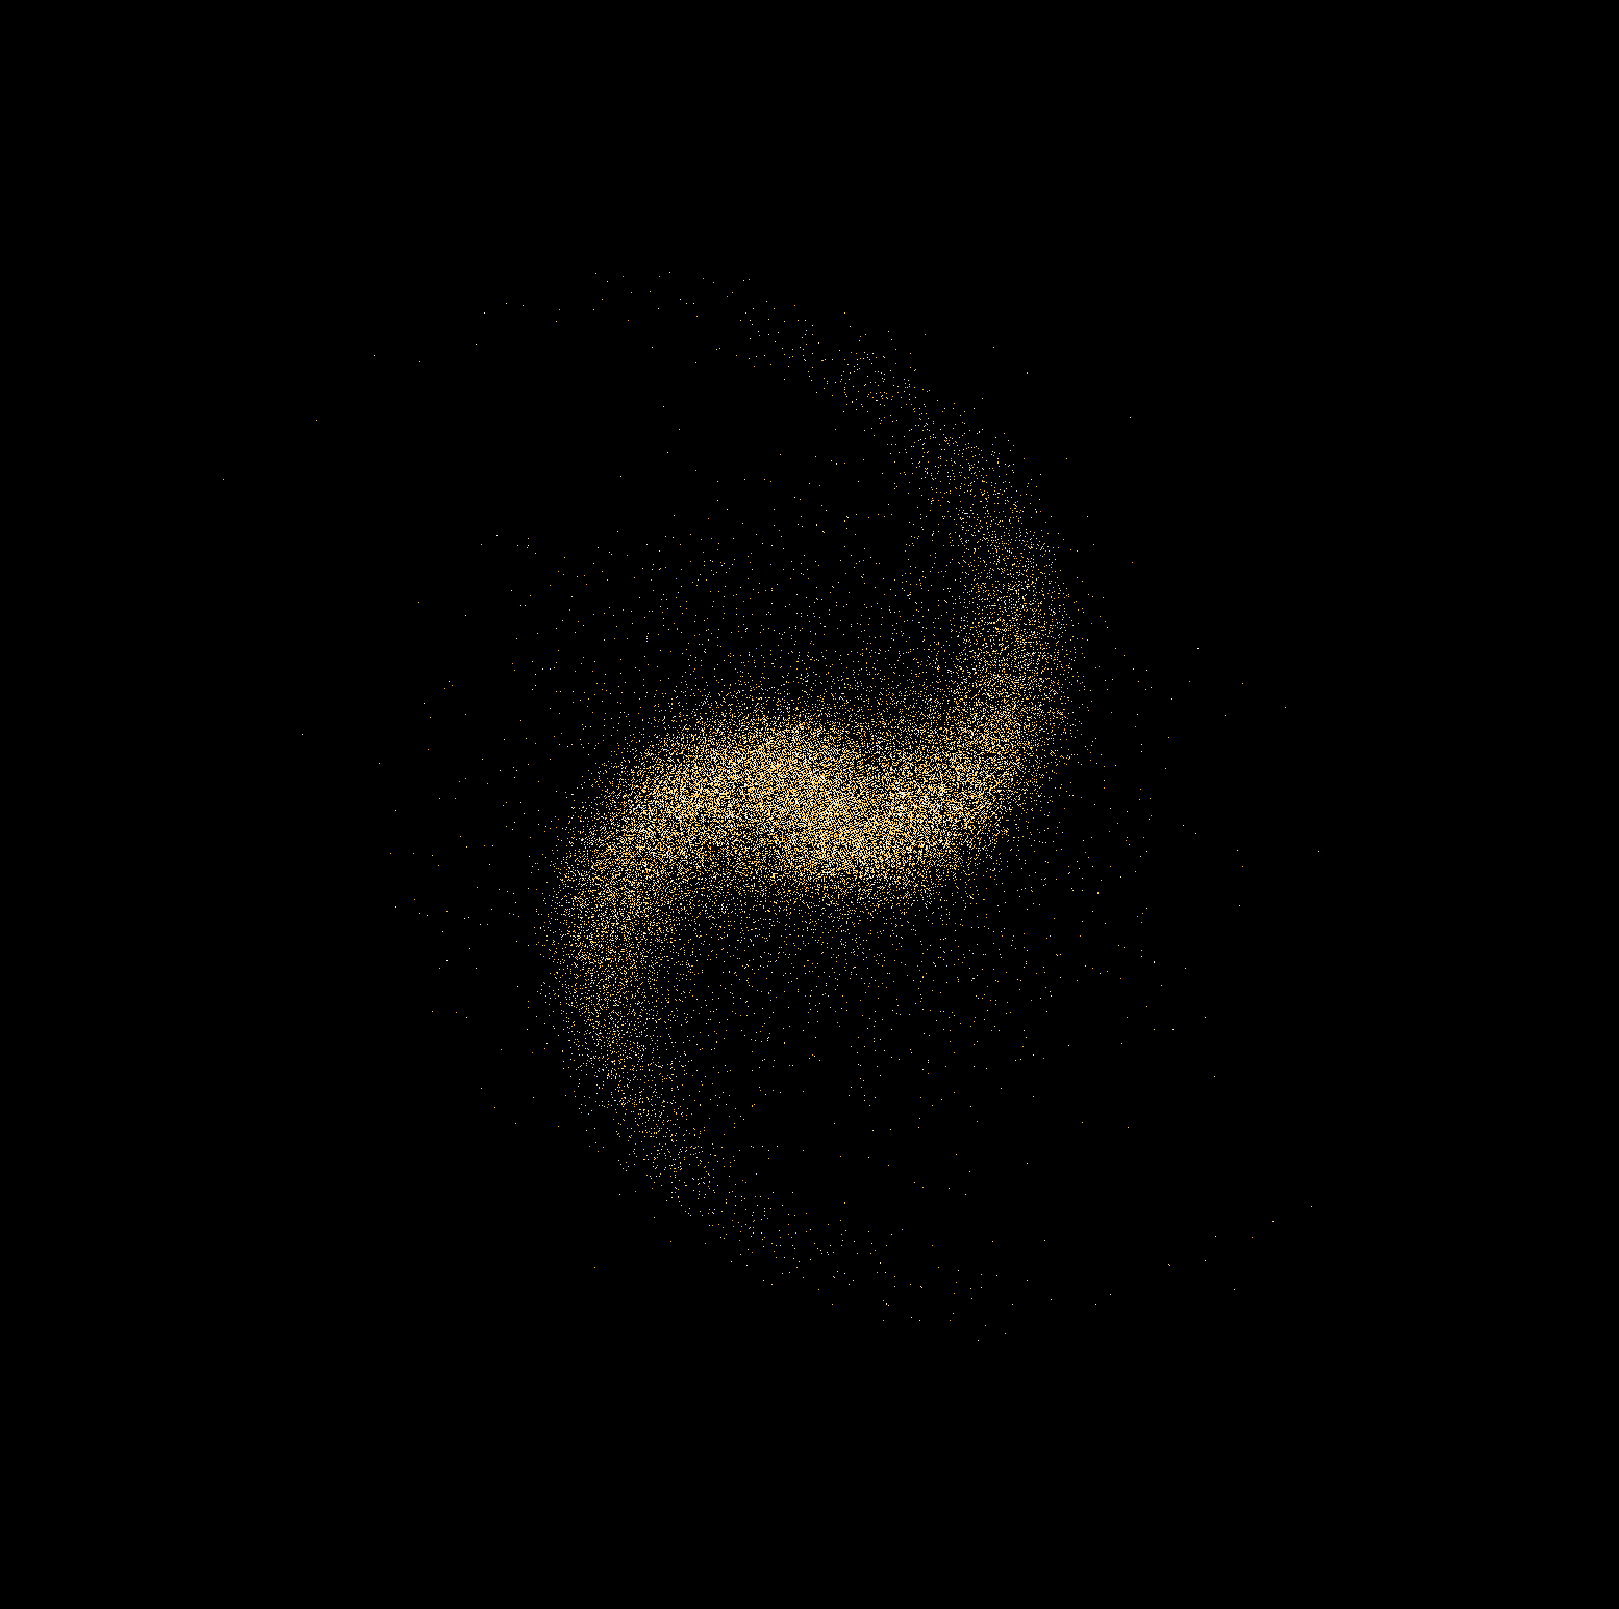

In [21]:
plot_galaxy(Galaxy(1500))

# Recommended size is between 1000 and 5000

This project was made to try out procedural generation in Python and to practice working with NumPy and Matplotlib.